In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter for Speed Related Crashes

Original dataset has over 818,000 entries, filtered dataset has a little over 68,000 (about 8.3% the original size)

In [ ]:
def filter_and_save_csv(input_file, output_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(input_file)
    # Filter rows where 'PRIM_CONTRIBUTORY_CAUSE' contains 'SPEED']
    filtered_df = df[df['PRIM_CONTRIBUTORY_CAUSE'].str.contains('SPEED') | df['SEC_CONTRIBUTORY_CAUSE'].str.contains('SPEED')]

    # Save the filtered DataFrame to a new CSV file
    filtered_df.to_csv(output_file, index=False)


input_file = 'Data/Traffic_Crashes_-_Crashes_20240328.csv' # Deleted from repository because its too big for git to manage. Can be found here: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data
output_file = 'Data/Speeding_Crashes.csv'
filter_and_save_csv(input_file, output_file)


# Traffic Crashes Node Visualization

In [2]:
file = 'Data/Speeding_Crashes.csv'
G = nx.Graph()

### Adding Nodes and Attributes

In [3]:
df = pd.read_csv(file)
added_nodes = 0
for i in range(0, len(df)):
    if np.isnan(df['LONGITUDE'][i]) or (df['LONGITUDE'][i] == 0):
        continue
    else:
        G.add_node(added_nodes, 
               pos=(df['LONGITUDE'][i], df['LATITUDE'][i]),
               lat=df['LATITUDE'][i], 
               lon=df['LONGITUDE'][i])
        added_nodes+=1

### Plotting Graph

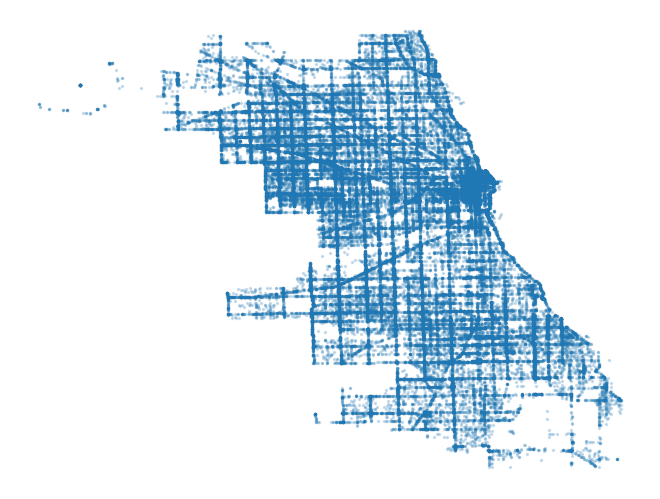

In [6]:
pos=nx.get_node_attributes(G,'pos')

# Draw and save graph
nx.draw(G, pos, node_size=2, alpha=0.2)

plt.savefig("Graphs/Crash Distribution Graph.png", dpi=1000)
plt.show()